# 1. Generating Images with Stable Diffusion and Custom Parameters

First, download and install the necessary dependencies and data files required for running the Stable Diffusion model.

In [ ]:
!pip install -r requirements.txt
!curl -OL https://huggingface.co/jinseokim/stable-diffusion-pytorch-data/resolve/main/data.v20221029.tar
!tar -xf data.v20221029.tar

This code demonstrates how to use the Stable Diffusion model to generate images based on a text prompt. It includes setting parameters like image size, sampling method, and classifier-free guidance. The generated image is displayed without axes for a clean output using matplotlib. This implementation is primarily based on the code provided during the class, with slight modifications for better customization and visualization.








100%|██████████| 20/20 [02:00<00:00,  6.03s/it]


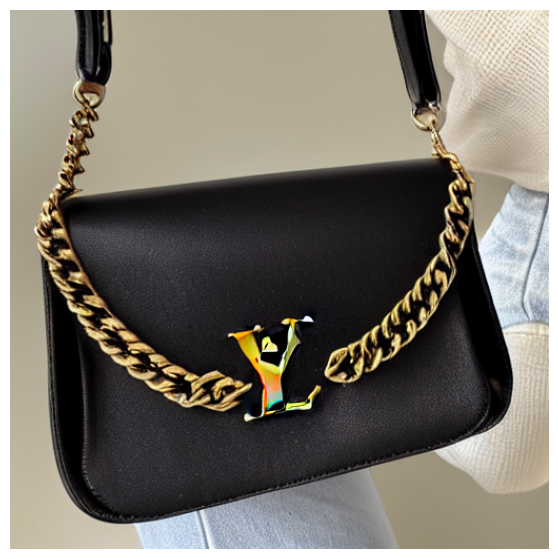

In [9]:
#@title Preload models (takes about ~20 seconds on default settings)
from stable_diffusion_pytorch import model_loader
from stable_diffusion_pytorch import pipeline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#preloading the stable diffusion models to the CPU 
models = model_loader.preload_models('cpu')

#positive prompt 
prompt = "a chic black LV bag"  #@param { type: "string" }
#creating a list of prompts
prompts = [prompt]

#negative prompt
uncond_prompt = "" #@param { type: "string" }
#creating a list of negative prompts if provided, or setting it to None
uncond_prompts = [uncond_prompt] if uncond_prompt else None

#generation parameters
device = 'cpu' #@param {"cpu", "cuda", "mps"]
strength = 0.8  #@param { type:"slider", min: 0, max: 1, step: 0.01 }
do_cfg = True  #@param { type: "boolean" }
cfg_scale = 7.5  #@param { type:"slider", min: 1, max: 14, step: 0.5 }
height = 512  #@param { type: "integer" }
width = 512  #@param { type: "integer" }
sampler = "k_lms"  #@param ["k_lms", "k_euler", "k_euler_ancestral"]
n_inference_steps = 20  #@param { type: "integer" }

#setting up a seed for reproducibility, so the same image can be generated with the same seed
use_seed = False  #@param { type: "boolean" }
if use_seed:
    seed = 42  #@param { type: "integer" }
else:
    seed = None

#generating the image using the specified prompts and generation parameters
image = pipeline.generate(prompts=prompts, uncond_prompts=uncond_prompts,
                  input_images=[], strength=strength,
                  do_cfg=do_cfg, cfg_scale=cfg_scale,
                  height=height, width=width, sampler=sampler,
                  n_inference_steps=n_inference_steps, seed=seed,
                  models=models, device=device, idle_device='cpu')[0]

#display the generated image
plt.figure(figsize=(7, 7))
plt.imshow(np.asarray(image))
plt.axis('off')  
plt.show()